<a href="https://colab.research.google.com/github/nicobotti91/coderds/blob/main/ProyectoDSParteII_Botti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import de Librerías


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Lectura de DataFrames

In [2]:
df_orders = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/orders.csv')

In [3]:
df_order_items = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/order_items.csv')

In [4]:
df_products = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/products.csv')

In [5]:
df_sellers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/sellers.csv')

In [6]:
df_geolocation = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/geolocation.csv')

In [7]:
df_payments = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/payments.csv')

In [8]:
df_customers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/customers.csv')

## Análisis de estado de DataFrames, Merge & Limpieza

In [9]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
df_products.head()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
df_products.drop(columns=['product_name_length','product_description_length','product_photos_qty'], axis=1, inplace=True)
df_products.head()

,product_id,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [13]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
df_merge_v1 =  df_orders.merge(
    df_order_items,
    how ='inner',
    on= 'order_id'
)

In [18]:
df_merge_v2 =  df_merge_v1.merge(
    df_products,
    how ='inner',
    on= 'product_id'
)
df_merge_v2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotive,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet Shop,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationary store,250.0,51.0,15.0,15.0


In [19]:
df_merge_v3 =  df_merge_v2.merge(
    df_sellers,
    how ='inner',
    on= 'seller_id'
)


In [22]:
df_merge_v4 =  df_merge_v3.merge(
    df_payments,
    how ='inner',
    on= 'order_id'
)

In [30]:
df_merged_ok =  df_merge_v4.merge(
    df_customers,
    how ='inner',
    on= 'customer_id'
)
df_merged_ok.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [31]:
# Tamaño del DataFrame

df_merged_ok.shape

(117601, 30)

In [32]:
# Info del DataFrame

df_merged_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   order_item_id                  117601 non-null  int64  
 9   product_id                     117601 non-null  object 
 10  seller_id                      117601 non-null  object 
 11  shipping_limit_date            117601 non-null  object 
 12  price                         

In [33]:
# Contabilizar los NaN
df_merged_ok.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1245
order_delivered_customer_date,2567
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [34]:
# Eliminar las columnas sobre las cuales no voy a hacer uso que tienen muchos NaN
df_merged_ok.drop(columns=['order_delivered_carrier_date','order_delivered_customer_date'], axis=1, inplace=True)
df_merged_ok.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_estimated_delivery_date,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0


In [35]:
# Borrar filas con NaN & Tamaño del DataFrame post eliminación

df_merged_ok_cleaned = df_merged_ok.dropna()
df_merged_ok_cleaned.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0


In [36]:
# Pasar la fecha a formato fecha
df_merged_ok_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_merged_ok_cleaned['order_purchase_timestamp'])

<ipython-input-36-d99eba3de405>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_merged_ok_cleaned['order_purchase_timestamp'])


In [37]:
# Pasar la fecha a formato Mes y Año
df_merged_ok_cleaned.loc[:, 'mes_anyo'] = df_merged_ok_cleaned['order_purchase_timestamp'].dt.strftime('%Y%m')
df_merged_ok_cleaned.head()

<ipython-input-37-852e9acc6e48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned.loc[:, 'mes_anyo'] = df_merged_ok_cleaned['order_purchase_timestamp'].dt.strftime('%Y%m')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808


In [38]:
# Pasar la columna Mes_anyo a formato int

df_merged_ok_cleaned['mes_anyo'] = df_merged_ok_cleaned['mes_anyo'].astype(int)

<ipython-input-38-9602932ff18a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned['mes_anyo'] = df_merged_ok_cleaned['mes_anyo'].astype(int)


In [39]:
#Renombrar la columna product category
df_merged_ok_cleaned.rename(columns={'product category':'product_category'}, inplace=True)
df_merged_ok_cleaned.head()

<ipython-input-39-13c4ef3f8b72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned.rename(columns={'product category':'product_category'}, inplace=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808


In [40]:
#Tamaño data Frame post eliminación de NaN
df_merged_ok_cleaned.shape

(115888, 29)

In [41]:
#Eliminar Duplicados

df_merged_revised = df_merged_ok_cleaned.drop_duplicates()

In [42]:
#Tamaño Data Frame post Revisión de duplicados
df_merged_revised.shape

(115888, 29)

In [43]:
# Revisar volumetrías de ventas por mes
df_merged_revised.groupby('mes_anyo')['order_id'].count()

,order_id
mes_anyo,
201609,3
201610,379
201612,1
201701,989
201702,1991
201703,3114
201704,2777
201705,4293
201706,3717


In [44]:
# Filtrado de ventas a partir de 2017 y previo a septiembre 2018 al ver que las volumetrías del resto no parecen ser fiables

df_target_sales = df_merged_revised[(df_merged_revised['mes_anyo'] >= 201701) & (df_merged_revised['mes_anyo'] <= 201808)]
df_target_sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808


In [45]:
df_target_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115504 entries, 0 to 117600
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115504 non-null  object        
 1   customer_id                    115504 non-null  object        
 2   order_status                   115504 non-null  object        
 3   order_purchase_timestamp       115504 non-null  datetime64[ns]
 4   order_approved_at              115504 non-null  object        
 5   order_estimated_delivery_date  115504 non-null  object        
 6   order_item_id                  115504 non-null  int64         
 7   product_id                     115504 non-null  object        
 8   seller_id                      115504 non-null  object        
 9   shipping_limit_date            115504 non-null  object        
 10  price                          115504 non-null  float64       
 11  freig

In [46]:
df_target_sales.describe()

,order_purchase_timestamp,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,mes_anyo
count,115504,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000
mean,2018-01-01 23:43:24.359061248,1.196149,120.891395,20.075732,2117.016051,30.307392,16.649960,23.110152,24480.521878,1.092837,2.942920,172.955081,35035.257783,201760.526796
min,2017-01-05 11:56:06,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.000000,1003.000000,201701.000000
25%,2017-09-13 19:47:13.249999872,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,61.010000,11310.000000,201709.000000
50%,2018-01-20 12:08:08,1.000000,74.900000,16.320000,700.000000,25.000000,13.000000,20.000000,13660.000000,1.000000,2.000000,108.195000,24315.000000,201801.000000
75%,2018-05-05 10:02:56,1.000000,134.900000,21.220000,1800.000000,38.000000,20.000000,30.000000,28470.000000,1.000000,4.000000,189.600000,58428.000000,201805.000000
max,2018-08-29 15:00:37,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000,99730.000000,29.000000,24.000000,13664.080000,99980.000000,201808.000000
std,NaN,0.699441,184.212783,15.875273,3784.441218,16.223304,13.478417,11.761622,27613.404069,0.725861,2.778055,268.269134,29807.899455,48.103756


## Revisión de Outliers

<Axes: xlabel='payment_value'>

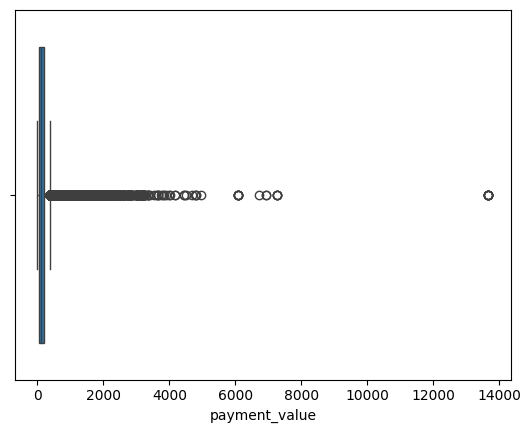

In [54]:
#Detección de Outliers de payment_payment value
sns.boxplot(x=df_target_sales['payment_value'])

In [55]:
# Generación del DF con outliers para análisis basandonos en el rango intercuartil
Q1 = df_target_sales['payment_value'].quantile(0.25)
Q3 = df_target_sales['payment_value'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_payment_value_outliers = df_target_sales[(df_target_sales['payment_value'] <= limite_inferior) | (df_target_sales['payment_value'] >= limite_superior)]
df_payment_value_outliers[['order_id','product_category','freight_value','payment_installments','payment_type','payment_value']].sort_values('payment_value',ascending=False)


,order_id,product_category,freight_value,payment_installments,payment_type,payment_value
15713,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15709,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15710,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15711,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15716,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
...,...,...,...,...,...,...
48425,803b1bae34b452deca8621b507e483f4,Cool Stuff,13.79,4,credit_card,382.79
108144,71ebfb916db0911bb0201d56790bc485,HEALTH BEAUTY,18.74,6,credit_card,382.74
53856,4c64f4f7a59f7092060cce91b033d7a9,HEALTH BEAUTY,18.74,1,UPI,382.74
111807,ef160b1ef2464ef2521274c790ee0cef,perfumery,3.65,4,credit_card,382.62


In [56]:
# Análisis de la categoría fixed telephony, categoría con valores más elevados para la columna en análisis "payment_value"

df_payment_value_outliers[df_payment_value_outliers['product_category']=='fixed telephony'].sort_values('payment_value',ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
15712,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15709,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15715,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15714,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15713,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15711,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15710,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15716,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
78644,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-08-02 00:00:00,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,...,SP,1,UPI,1,7274.88,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,201807
78641,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-08-02 00:00:00,1,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,...,SP,1,UPI,1,7274.88,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,201807


Si bien son valores extremos no se detectan indicios de que no sean válidos por lo que se toma la decisión de mantenerlos. Idealmente al definir el modelo habría que tener en cuenta si los mismos afectan al modelo o no para tomar la decisión final

Evolutivo de ventas
Correlación de ventas con sellers
Distribución ventas y sellers por ciudad
Relación valor de orden con cuotas
Clientes con mayor cantidad de compras y categorías de dichas compras

# Hipótesis, Análisis y Visualización del DataFrame

# ------- *Hipótesis 1:* -------

#### ¿Como evolucionaron las ventas ? Está el comportamiento de las ventas relacionado a la cantidad de sellers disponibles en el e-commerce?

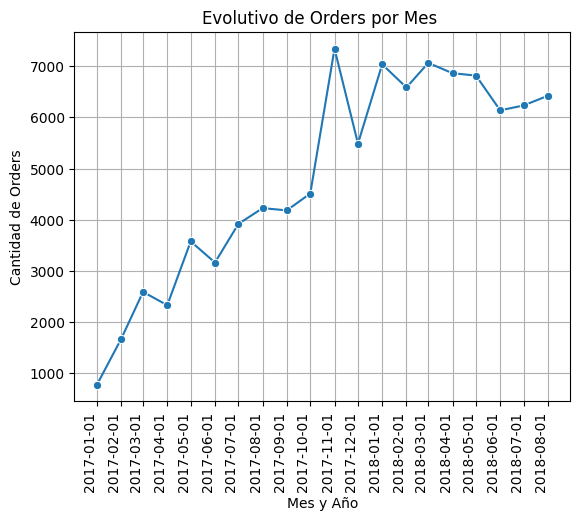

In [223]:
# Crear el DataFrame agrupando por mes la cantidad de orders únicas y ordenandolas de más antiguo a más nuevo
orders_por_mes = df_target_sales.groupby(['mes_anyo'])['order_id'].nunique().reset_index()
orders_por_mes['mes_anyo'] = pd.to_datetime(orders_por_mes['mes_anyo'], format='%Y%m')
orders_por_mes_sorted = orders_por_mes.sort_values(by='mes_anyo')
orders_por_mes_sorted

# Crear el gráfico con una línea para cada categoría
sns.lineplot(data=orders_por_mes_sorted, x='mes_anyo', y='order_id', marker="o",)

# Configurar el gráfico
plt.title('Evolutivo de Orders por Mes ')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Orders')
plt.xticks(orders_por_mes['mes_anyo'], rotation=90, ha='right')
plt.grid(True)
##plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='orders', ylabel='sellers'>

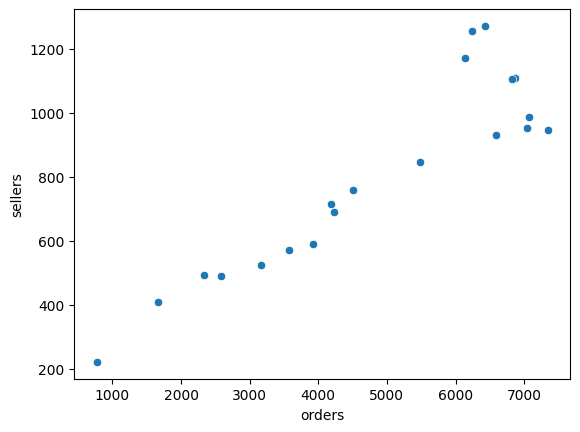

In [224]:
#Distribución de evolución de ventas vs Sellers
df_target_sales_grouped_orders_sellers = df_target_sales.groupby(['mes_anyo']).agg({'order_id':'nunique','seller_id':'nunique'})
df_target_sales_grouped_orders_sellers.rename(columns={'order_id':'orders','seller_id':'sellers'}, inplace=True)
sns.scatterplot(data=df_target_sales_grouped_orders_sellers, x='orders', y='sellers')

#### Lo que nos muestran los gráficos es que **las ventas tienen un crecimiento extraordinario mes a mes**, **y que a su vez tienen una correlación muy alta con la cantidad de Sellers** que hay en el ecommerce. Si bien la correlación es positiva, es importante recordar que correlación no implica causalidad. Esto significa que, aunque las ventas y el número de sellers aumenten juntos, no necesariamente significa que el aumento de sellers sea la única causa del aumento de ventas. Pueden existir otros factores que influyan en ambos, como la estacionalidad, las campañas de marketing, o la situación económica general. Sin embargo, considerando la información disponible, es razonable concluir que el incremento de sellers ha tenido un impacto positivo en el crecimiento de las ventas del ecommerce.

# ------- *Hipótesis 2:* -------

#### *¿Cual es la distribución de compras por cliente? ¿Los recurrentes cada cuanto lo hacen?*

In [75]:
customer_orders = df_target_sales.groupby('customer_unique_id').agg({'order_id':'nunique'}).rename(columns={'order_id': 'num_orders'}).reset_index()
customer_orders_distribution = customer_orders.groupby(by='num_orders').agg({'customer_unique_id':'nunique'}).reset_index()
customer_orders_distribution.rename(columns={'customer_unique_id':'customers'}, inplace=True)
customer_orders_distribution['customers_weight'] = customer_orders_distribution['customers']/customer_orders_distribution['customers'].sum()*100
customer_orders_distribution

,num_orders,customers,customers_weight
0,1,90962,96.976481
1,2,2605,2.777245
2,3,184,0.196166
3,4,30,0.031984
4,5,9,0.009595
5,6,3,0.003198
6,7,3,0.003198
7,9,1,0.001066
8,15,1,0.001066


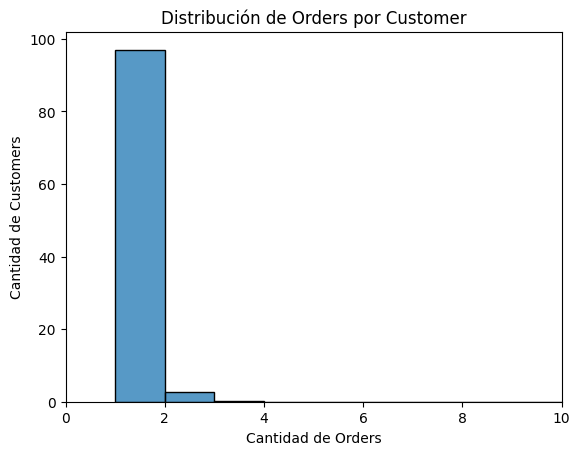

In [76]:

# Crear el histograma de distribución de Orders por Customer
sns.histplot(data=customer_orders_distribution, x='num_orders',
             weights='customers_weight', bins=[1,2,3,4,5,6,7,8,9,10], stat='count')

# Configurar el gráfico
plt.title('Distribución de Orders por Customer')
plt.xlabel('Cantidad de Orders')
plt.ylabel('Cantidad de Customers')
plt.xlim(0, 10)
plt.show()

In [71]:
recurring_customer = customer_orders[customer_orders['num_orders']>1]
recurring_customer.sort_values('num_orders',ascending=False)

,customer_unique_id,num_orders
51713,8d50f5eadf50201ccdcedfb9e2ac8455,15
22911,3e43e6105506432c953e165fb2acf44c,9
74302,ca77025e7201e3b30c44b472ff346268,7
10116,1b6c7548a2a1f9037c1fd3ddfed95f33,7
36896,6469f99c1f9dfae7733b25662e7f1782,7
...,...,...
32810,59268ee5dc0cd98a36ea808010826cc8,2
32839,5936fabf5dfeaa6c31d9f649b5794e2c,2
32851,5941ba7f91b519d195e16e34fcf61bac,2
32892,595ee036d3a69e80934a9b3618834085,2


In [84]:
# Agrupa por 'customer_id' y calcula la cantidad de 'order_id' y la diferencia de tiempo entre ellos
customer_orders_time = df_target_sales.groupby('customer_unique_id')['order_purchase_timestamp'].agg(['nunique', lambda x: x.sort_values().diff().mean()])

# Renombra las columnas para mayor claridad
customer_orders_time = customer_orders_time.rename(columns={'nunique': 'num_orders', '<lambda_0>': 'avg_time_between_orders'}).sort_values('num_orders', ascending=False).reset_index()
returning_customer_orders_time = customer_orders_time[customer_orders_time['num_orders']>1]
returning_customer_orders_time['avg_time_between_orders'] = returning_customer_orders_time['avg_time_between_orders'].apply(lambda x: round(x.days, 1) if pd.notna(x) else x)
returning_customer_orders_time


<ipython-input-84-b31e823dc139>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returning_customer_orders_time['avg_time_between_orders'] = returning_customer_orders_time['avg_time_between_orders'].apply(lambda x: round(x.days, 1) if pd.notna(x) else x)


,customer_unique_id,num_orders,avg_time_between_orders
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,32
1,3e43e6105506432c953e165fb2acf44c,9,12
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7,10
3,ca77025e7201e3b30c44b472ff346268,7,21
4,6469f99c1f9dfae7733b25662e7f1782,7,35
...,...,...,...
2586,87315ceb47e77d03a1c90474e228db6c,2,0
2587,4291db0da71914754618cd789aebcd56,2,35
2588,c3efecdc2ca34416d845120af0bfca09,2,14
2589,c40b4a21d854ab194280dadc8998061f,2,10


In [85]:
#Métricas del data frame returning_customer_orders_time
returning_customer_orders_time.describe()

,num_orders,avg_time_between_orders
count,2591.000000,2591.000000
mean,2.109996,72.761482
std,0.498512,98.073837
min,2.000000,0.000000
25%,2.000000,1.500000
50%,2.000000,29.000000
75%,2.000000,108.000000
max,15.000000,524.000000


<Axes: xlabel='avg_time_between_orders'>

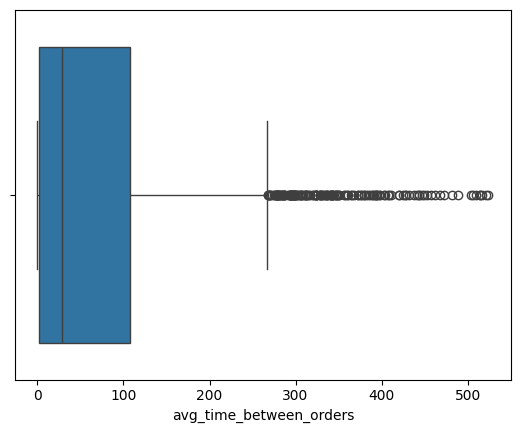

In [86]:
#Detección de Outliers de payment_payment value
sns.boxplot(x=returning_customer_orders_time['avg_time_between_orders'])

### Análisis:
 - % de clientes recurrentes: ~3%
 - La mayoría de los clientes recurrentes realizan su segunda compra en un plazo de entre 0 y aproximadamente 108 días, con una mediana de 29 días.
 -  A su vez, la mayoría realiza solo 2 compras.
### Recomendaciones:
La empresa presenta oportunidades a nivel de Retention & Loyalty, se podrían trabajar distintas alternativas con intención de mejorar en este aspecto como:
*   Campañas de remarketing: Dirigidas a clientes que no han comprado en un tiempo determinado, ofreciendo incentivos y oportunidades para que vuelvan a comprar.
*   Programas de fidelización: Que recompensen a los clientes recurrentes por su frecuencia de compra.
*   Análisis de los valores atípicos: Para entender las razones por las que algunos clientes tardan mucho más en volver a comprar.

# ------- *Hipótesis 3:* -------

#### En que ciudades se llevan a cabo más compras? Y ventas? Y si lo vemos a nivel de revenue?

In [108]:
customer_city_sales = df_target_sales.groupby('customer_city').agg({'order_id':'nunique','price':'sum'}).sort_values('order_id',ascending=False).head(10).rename(columns={'order_id':'orders','price':'order_total'}).reset_index()
customer_city_sales['avg_order_total'] = customer_city_sales['order_total']/customer_city_sales['orders']
customer_city_sales['orders_weight'] = customer_city_sales['orders']/customer_city_sales['orders'].sum()*100
customer_city_sales

,customer_city,orders,order_total,avg_order_total,orders_weight
0,sao paulo,15119,1973787.89,130.550161,44.321646
1,rio de janeiro,6692,1010930.79,151.065569,19.617730
2,belo horizonte,2690,361139.49,134.252599,7.885788
3,brasilia,2080,308545.89,148.339370,6.097561
4,curitiba,1489,216278.37,145.250752,4.365033
5,campinas,1407,192938.93,137.127882,4.124648
6,porto alegre,1347,190849.75,141.685041,3.948757
7,salvador,1219,192350.07,157.793331,3.573523
8,guarulhos,1162,153680.23,132.254931,3.406426
9,sao bernardo do campo,907,106993.90,117.964609,2.658888


In [106]:
seller_city_sales = df_target_sales.groupby('seller_city').agg({'order_id':'nunique','payment_value':'sum'}).sort_values('order_id',ascending=False).head(10).rename(columns={'order_id':'orders','payment_value':'revenue'}).reset_index()
seller_city_sales['avg_revenue'] = seller_city_sales['revenue']/seller_city_sales['orders']
seller_city_sales['orders_weight'] = seller_city_sales['orders']/seller_city_sales['orders'].sum()*100
seller_city_sales

,seller_city,orders,revenue,avg_revenue,orders_weight
0,sao paulo,24340,4201973.66,172.636551,50.485356
1,ibitinga,6528,1042974.57,159.769389,13.540197
2,santo andre,2707,346714.13,128.080580,5.614785
3,curitiba,2671,641580.55,240.202377,5.540114
4,belo horizonte,2335,293241.34,125.585156,4.843193
5,rio de janeiro,2118,479261.98,226.280444,4.393097
6,ribeirao preto,1982,383465.31,193.473920,4.111010
7,sao jose do rio preto,1965,413605.80,210.486412,4.075749
8,maringa,1858,380319.30,204.692842,3.853812
9,guarulhos,1708,451967.04,264.617705,3.542686


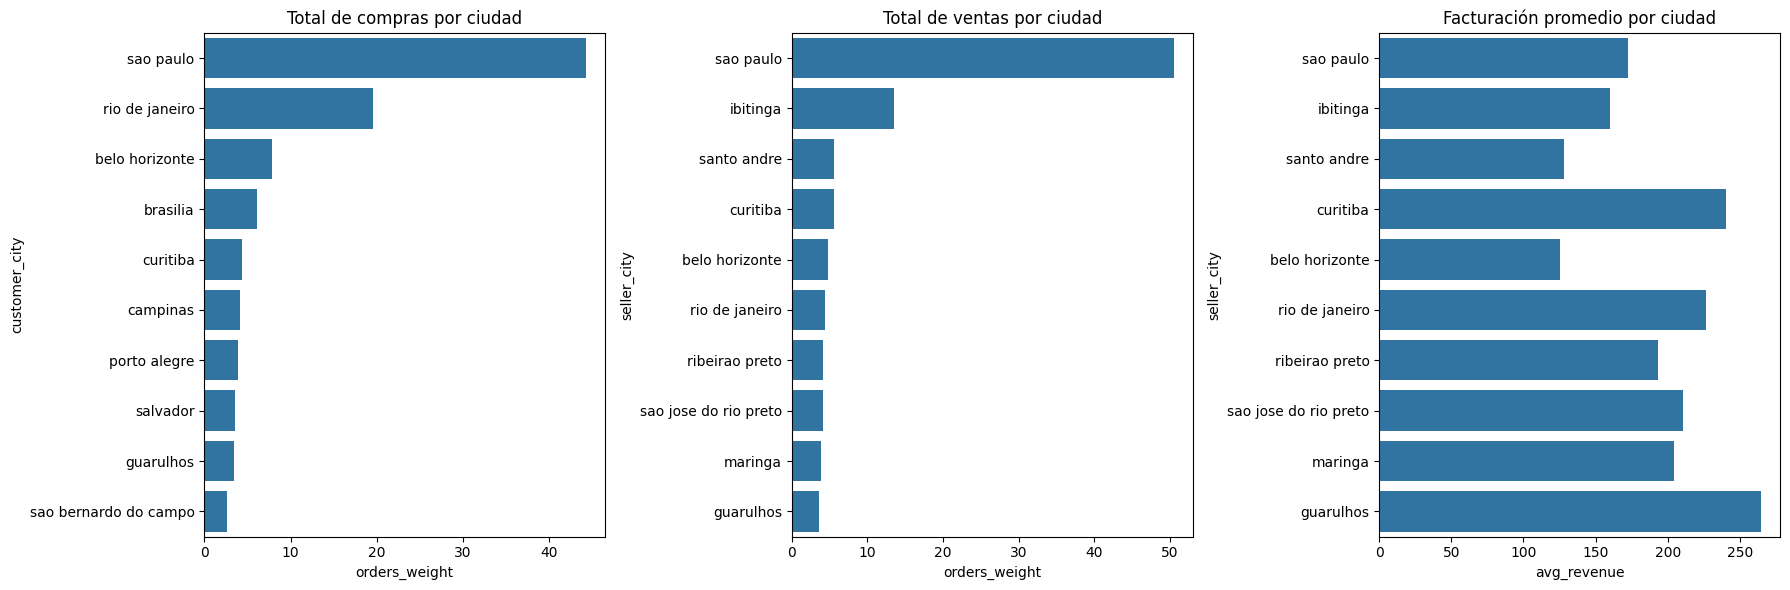

In [115]:
# Crear una figura con tres subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # Ajusta figsize si es necesario

# Gráfico 1 en el primer subplot (axes[0])
sns.barplot(data=customer_city_sales, x='orders_weight', y='customer_city', ax=axes[0])
axes[0].set_title('Total de compras por ciudad')

# Gráfico 2 en el segundo subplot (axes[1])
sns.barplot(data=seller_city_sales, x='orders_weight', y='seller_city', ax=axes[1])
axes[1].set_title('Total de ventas por ciudad')

# Gráfico 3 en el tercer subplot (axes[2])
sns.barplot(data=seller_city_sales, x='avg_revenue', y='seller_city', ax=axes[2])
axes[2].set_title('Facturación promedio por ciudad')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

### Análisis:
El análisis de compras y ventas por ciudad revela una concentración de la actividad del ecommerce en Sao Paulo y Rio de Janeiro, con una distribución desigual entre las demás ciudades. Es importante que la empresa tenga en cuenta estas diferencias regionales al planificar sus estrategias de marketing, logística y expansión.

###Recomendaciones:
*   Fortalecer la presencia en Sao Paulo, ciudad con mayor demanda y donde se ubican el mayor % de sellers
* Explorar oportunidades en Rio de Janeiro: Se podría considerar la posibilidad de expandir la oferta de productos y servicios en Rio de Janeiro para aprovechar su potencial como segundo mercado.
*  Analizar la facturación promedio: Investigar las razones detrás de las variaciones en la facturación promedio por ciudad para optimizar las estrategias de precios y promociones.

# ------- *Hipótesis 4:* -------

#### ¿Cuales son los tipos de pago más utilizados? Existe una relación entre la cantidad de cuotas seleccionadas con el valor de la order?

In [150]:
df_payment_type_grouped = df_target_sales.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False).reset_index()
df_payment_type_grouped['orders_weight']=df_payment_type_grouped['order_id']/df_payment_type_grouped['order_id'].sum()*100
df_payment_type_grouped.rename(columns={'order_id':'orders'}).reset_index()

,index,payment_type,orders,orders_weight
0,0,credit_card,74668,75.316475
1,1,UPI,19281,19.448451
2,2,voucher,3697,3.729108
3,3,debit_card,1493,1.505966


In [146]:
# % de orders con cuotas / total
df_payments_with_installments = df_target_sales[df_target_sales['payment_installments']>1]['order_id'].nunique()/df_target_sales['order_id'].nunique()*100
print (f'% orders con cuotas / total: {df_payments_with_installments:.2f}%')

% orders con cuotas / total: 51.52%


In [159]:
df_payment_installment_distribution = df_target_sales.groupby('payment_installments')['order_id'].nunique().reset_index().rename(columns={'order_id':'orders'})
df_payment_installment_distribution = df_payment_installment_distribution[df_payment_installment_distribution['payment_installments']>0]
df_payment_installment_distribution['orders_weight']=df_payment_installment_distribution['orders']/df_payment_installment_distribution['orders'].sum()*100
df_payment_installment_distribution

,payment_installments,orders,orders_weight
1,1,47766,48.842488
2,2,12062,12.333838
3,3,10199,10.428852
4,4,6930,7.086179
5,5,5113,5.228230
6,6,3821,3.907113
7,7,1573,1.608450
8,8,4192,4.286474
9,9,627,0.641131
10,10,5176,5.292650


<Axes: xlabel='payment_installments', ylabel='Count'>

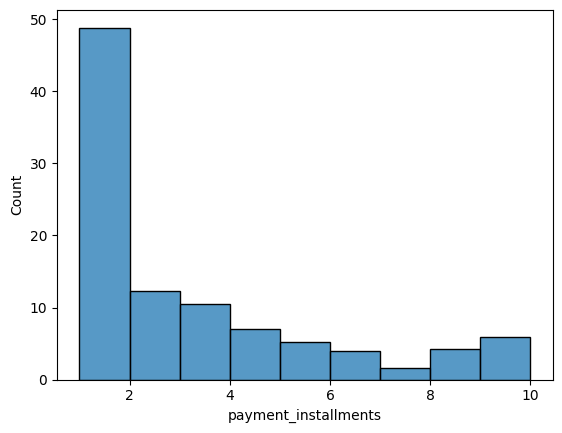

In [161]:
sns.histplot(data=df_payment_installment_distribution.head(10), x='payment_installments',
             weights='orders_weight', bins=[1,2,3,4,5,6,7,8,9,10], stat='count')

#

In [131]:
df_installments_correlation = df_target_sales[['payment_value','payment_installments','customer_city','product_category']]

In [132]:
# Crear un diccionario vacío para almacenar el encoding
category_encoding = {}

# Iterar sobre las categorías únicas de 'product_category'
for i, category in enumerate(df_installments_correlation['product_category'].unique()):
    # Asignar un valor numérico a cada categoría
    category_encoding[category] = i

# Crear una nueva columna con el encoding
df_installments_correlation['product_category_encoded'] = df_installments_correlation['product_category'].map(category_encoding)


<ipython-input-132-63061bd5777d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_installments_correlation['product_category_encoded'] = df_installments_correlation['product_category'].map(category_encoding)


,payment_value,payment_installments,customer_city,product_category,product_category_encoded
0,18.12,1,sao paulo,housewares,0
1,2.00,1,sao paulo,housewares,0
2,18.59,1,sao paulo,housewares,0
3,141.46,1,barreiras,perfumery,1
4,179.12,3,vianopolis,automotive,2
...,...,...,...,...,...
117596,195.00,3,praia grande,babies,15
117597,271.01,5,nova vicosa,ELECTRICES 2,47
117598,441.16,4,japuiba,computer accessories,8
117599,441.16,4,japuiba,computer accessories,8


In [133]:
# Crear un diccionario vacío para almacenar el encoding
city_encoding = {}

# Iterar sobre las categorías únicas de 'customer_city'
for i, category in enumerate(df_installments_correlation['customer_city'].unique()):
    # Asignar un valor numérico a cada categoría
    city_encoding[category] = i

# Crear una nueva columna con el encoding
df_installments_correlation['customer_city_encoded'] = df_installments_correlation['customer_city'].map(city_encoding)

<ipython-input-133-c543f0bbc8e1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_installments_correlation['customer_city_encoded'] = df_installments_correlation['customer_city'].map(city_encoding)


,payment_value,payment_installments,customer_city,product_category,product_category_encoded,customer_city_encoded
0,18.12,1,sao paulo,housewares,0,0
1,2.00,1,sao paulo,housewares,0,0
2,18.59,1,sao paulo,housewares,0,0
3,141.46,1,barreiras,perfumery,1,1
4,179.12,3,vianopolis,automotive,2,2
...,...,...,...,...,...,...
117596,195.00,3,praia grande,babies,15,148
117597,271.01,5,nova vicosa,ELECTRICES 2,47,4091
117598,441.16,4,japuiba,computer accessories,8,525
117599,441.16,4,japuiba,computer accessories,8,525


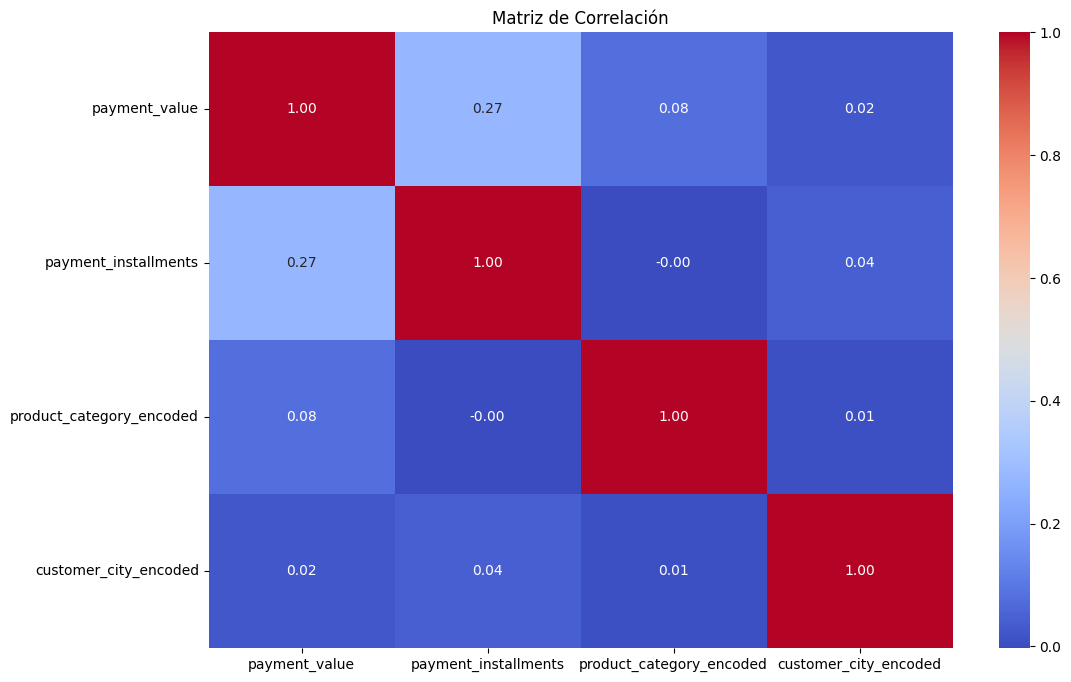

In [137]:
# Calcular la matriz de correlación
correlation_matrix = df_installments_correlation.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

### **Análisis**:
#### - El principal metodo de pago seleccionado para las compras es la tarjeta de crédito con ~75%
#### - ~52% de las compras se realizan con cuotas, principalmente 2,3 y 4 cuotas
#### - Al analizar la correlación entre las variables de payment_value, product_category y customer_city con los payment_installments, vemos que no existe una correlación muy fuerte entre dichas variables ya que la que parece tener mayor influencia es el payment_value con 0,27

### **Recomendaciones**:

#### - Mantener la flexibilidad en las opciones de pago: Dado el alto uso de tarjetas de crédito y cuotas, es importante seguir ofreciendo estas opciones a los clientes.
#### - Promocionar las opciones de financiación: Se podrían implementar campañas de marketing para destacar las ventajas de pagar en cuotas, especialmente para productos de mayor valor / Ajustar las opciones de cuotas según el valor de la orden: Se podría considerar la posibilidad de ofrecer un mayor número de cuotas para órdenes de mayor valor, para facilitar la compra a los clientes.
#### - Monitorear las tendencias de pago: Es importante seguir analizando los datos de pago para identificar cambios en las preferencias de los clientes y adaptar las estrategias en consecuencia.